In [1]:
import sys
sys.path.insert(0,'..')

In [2]:
from dataset import ASODataset
from graph_fn import onehot_everything
from trainer import Trainer
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ExponentialLR
import torch
from torch_geometric.loader import DataLoader
from models import *

In [3]:
#hyperparameters
LEARNING_RATE = 7.5e-3
BATCH_SIZE = 16
EPOCHS = 50
DROP_OUT = 0.05
INPUT_SIZE = 53
OUTPUT_SIZE = 1
HIDDEN_SIZE = 50

In [4]:
a = ASODataset(onehot_everything)
X_train, X_test, y_train, y_test = train_test_split(a.data[0], a.data[1], test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [5]:
device = torch.device('cuda')
model = MLP(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE, 3, dp_rate=DROP_OUT)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = ExponentialLR(optimizer, gamma=0.95)

Epoch: 001, Train Loss: 0.6584, Test Loss: 0.6584, Train MAE: 0.2718, Test MAE: 0.2656, , Train R2: -2.9345, Test R2: -3.1928
Epoch: 002, Train Loss: 0.6248, Test Loss: 0.6253, Train MAE: 0.2440, Test MAE: 0.2371, , Train R2: -2.2205, Test R2: -2.4107
Epoch: 003, Train Loss: 0.5868, Test Loss: 0.5878, Train MAE: 0.2108, Test MAE: 0.2039, , Train R2: -1.4292, Test R2: -1.5444
Epoch: 004, Train Loss: 0.5444, Test Loss: 0.5460, Train MAE: 0.1700, Test MAE: 0.1624, , Train R2: -0.5933, Test R2: -0.6296
Epoch: 005, Train Loss: 0.5085, Test Loss: 0.5108, Train MAE: 0.1310, Test MAE: 0.1225, , Train R2: 0.0323, Test R2: 0.0526
Epoch: 006, Train Loss: 0.5035, Test Loss: 0.5067, Train MAE: 0.1130, Test MAE: 0.1091, , Train R2: 0.0827, Test R2: 0.0931
Epoch: 007, Train Loss: 0.5245, Test Loss: 0.5287, Train MAE: 0.1180, Test MAE: 0.1164, , Train R2: -0.1602, Test R2: -0.1889
Epoch: 008, Train Loss: 0.5227, Test Loss: 0.5274, Train MAE: 0.1169, Test MAE: 0.1159, , Train R2: -0.1416, Test R2: -0.1

array([0.4453392 , 0.03147767, 0.90135   , 0.45336166, 0.02992653,
       0.92320071])

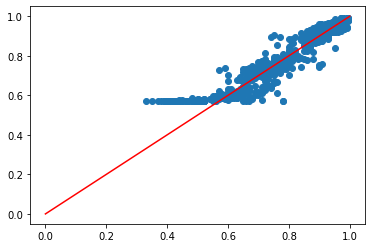

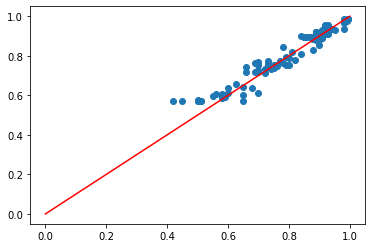

In [6]:
t = Trainer(model, device, optimizer, scheduler, glob_v= False, no_graph = True)
t.train_no_graph(torch.tensor(X_train, dtype=torch.float), torch.tensor(X_val, dtype=torch.float), torch.tensor(y_train, dtype=torch.float), torch.tensor(y_val, dtype=torch.float), nn.BCELoss, EPOCHS)

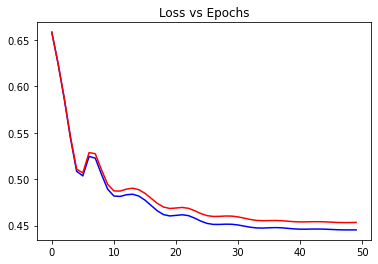

In [7]:
t.plot_log()

RuntimeError: Found dtype Double but expected Float

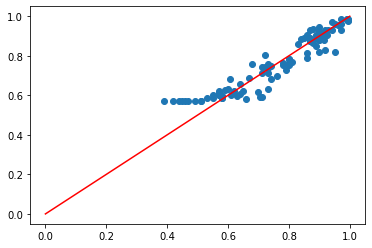

In [12]:
t.eval_no_graph(torch.tensor(X_test, dtype=torch.float), torch.tensor(y_test, dtype=torch.float), True, print_flag=True)